In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.tri as mtri
import seaborn

In [31]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe = fm.FontEntry(
    fname=r'font/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe) # Matplotlib에 폰트 추가

# pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.family': 'NanumGothic', 'font.size': 14})
# pyplot에서 '-(마이너스)'를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
iris = seaborn.load_dataset('iris')          # 붓꽃 데이터
titanic = seaborn.load_dataset('titanic')    # 타이타닉호 데이터
tips = seaborn.load_dataset('tips')          # 팁 데이터
flights = seaborn.load_dataset('flights')    # 여객운송 데이터

### seaborn을 활용한 1차원 분포 플롯
seaborn 패키지에서 제공해주는 여러 가지 메서드를 활용하여 간단하게 1차원 분포 플롯을 표시할 수 있음

#### 1차원 실수 분포 플롯
seaborn 패키지는 히스토그램 형식과는 다른 커널 밀도 플롯, 러그 플롯을 제공함

- `rugplot()` : 데이터 위치를 x축 위에 작은 선분으로 표시(러그 플롯)  

- `kdeplot()` : 히스토그램과 비슷하지만 곡선형태로 표시 (커널 밀도 플롯)

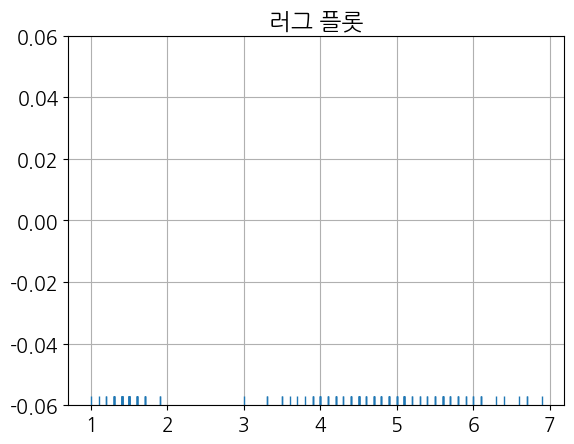

In [8]:
# Iris 데이터 중, 꽃잎의 길이에 대한 데이터
data = iris.petal_length.values 

seaborn.rugplot(data)
plt.title('러그 플롯')
plt.grid(True)
plt.show()

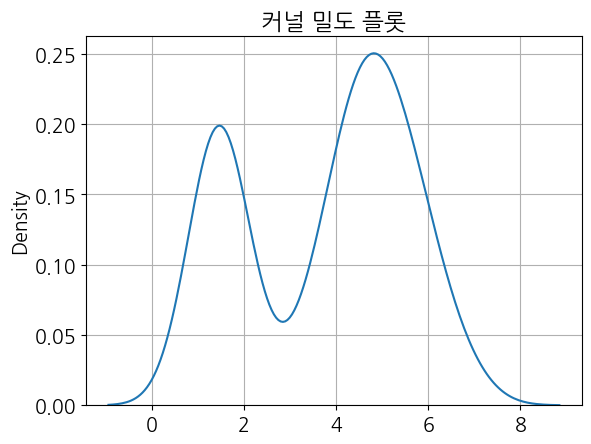

In [10]:
seaborn.kdeplot(data)
plt.title('커널 밀도 플롯')
plt.grid(True)
plt.show()

#### 카운터 플롯
seaborn 패키지의 `countplot()` 메서드로 각 카테고리 별 사이즈를 표시할 수 있음  

`countplot()` 메서드는 데이터프레임만 사용 가능  

`countplot(x = '컬럼명', data = 데이터프레임)`

In [11]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


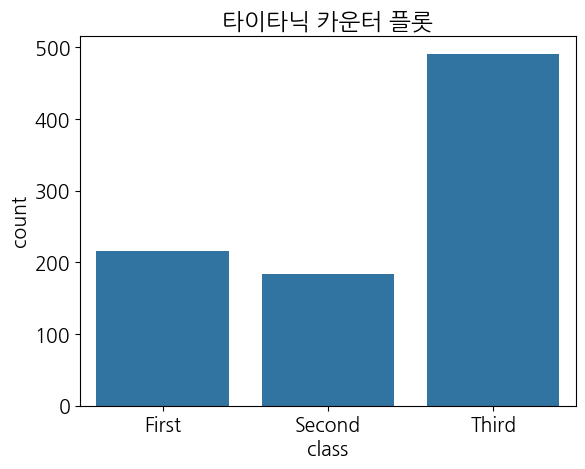

In [14]:
seaborn.countplot(x = 'class', data = titanic) # titanic 데이터 중 타이타닉호의 각 클래스별, 승객 수
plt.title('타이타닉 카운터 플롯')
plt.show()

In [15]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


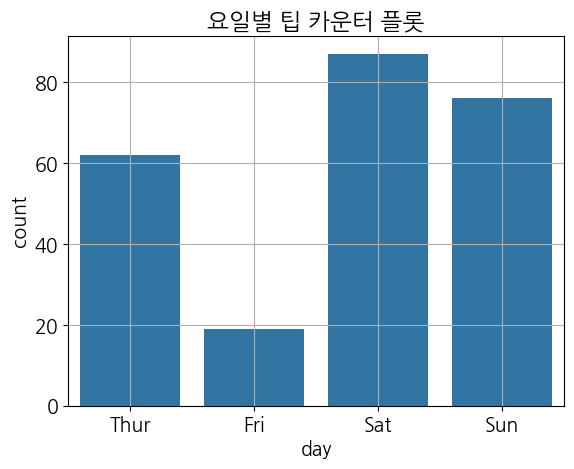

In [16]:
seaborn.countplot(x = 'day', data = tips) # tips 데이터 중 요일별 팁을 준 횟수
plt.title('요일별 팁 카운터 플롯')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 데이터
다차원 데이터는 3가지의 경우의 수를 가질 수 있음  

- 모든 데이터가 모두 실수 값인 경우
- 모든 데이터가 모두 카테고리 값인 경우
- 데이터가 실수 값과 카테고리 값이 섞여 있는 경우

#### 2차원 실수형 데이터
데이터가 2차원이면서 모두 실수이면 `jointplot()` 메서드를 사용하여 표현할 수 있음  

`jointplot()` : 스캐터 플롯, 등고선 플롯 등을 나타낼 수 있고 양측에 히스토그램을 표현해 줌(데이터 프레임만 사용가능)

``` python
jointplot(
    data = dataframe, x = 'x변수가 될 데이터프레임의 열이름', 
    y = 'y변수가 될 데이터프레임의 열이름', kind = '차트의 종류'
)
```

In [17]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


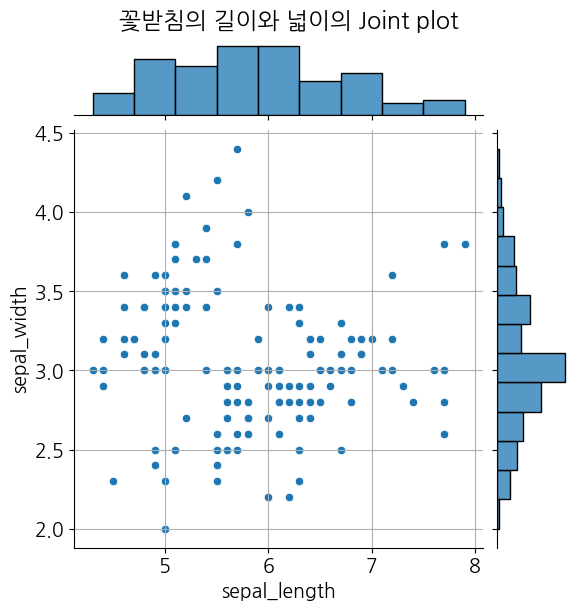

In [20]:
seaborn.jointplot(data=iris, x='sepal_length', y='sepal_width', kind = 'scatter')
plt.suptitle('꽃받침의 길이와 넓이의 Joint plot', y = 1.02) # y는 타이틀과 그래프 사이의 간격 조정
plt.grid(True)
plt.show()

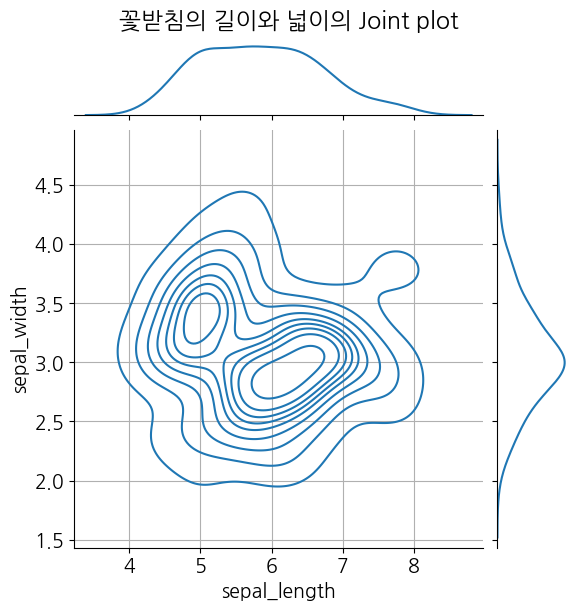

In [21]:
seaborn.jointplot(data=iris, x='sepal_length', y='sepal_width', kind = 'kde')
plt.suptitle('꽃받침의 길이와 넓이의 Joint plot', y = 1.02) # y는 타이틀과 그래프 사이의 간격 조정
plt.grid(True)
plt.show()

#### 다차원 실수형 데이터
3차원 이상의 데이터라면 `pairplot()` 메서드로 그리드 형태의 스캐터 플롯의 행렬을 만들어줌,  

같은 데이터가 만나는 대각선에는 각 데이터의 히스토그램을 표현

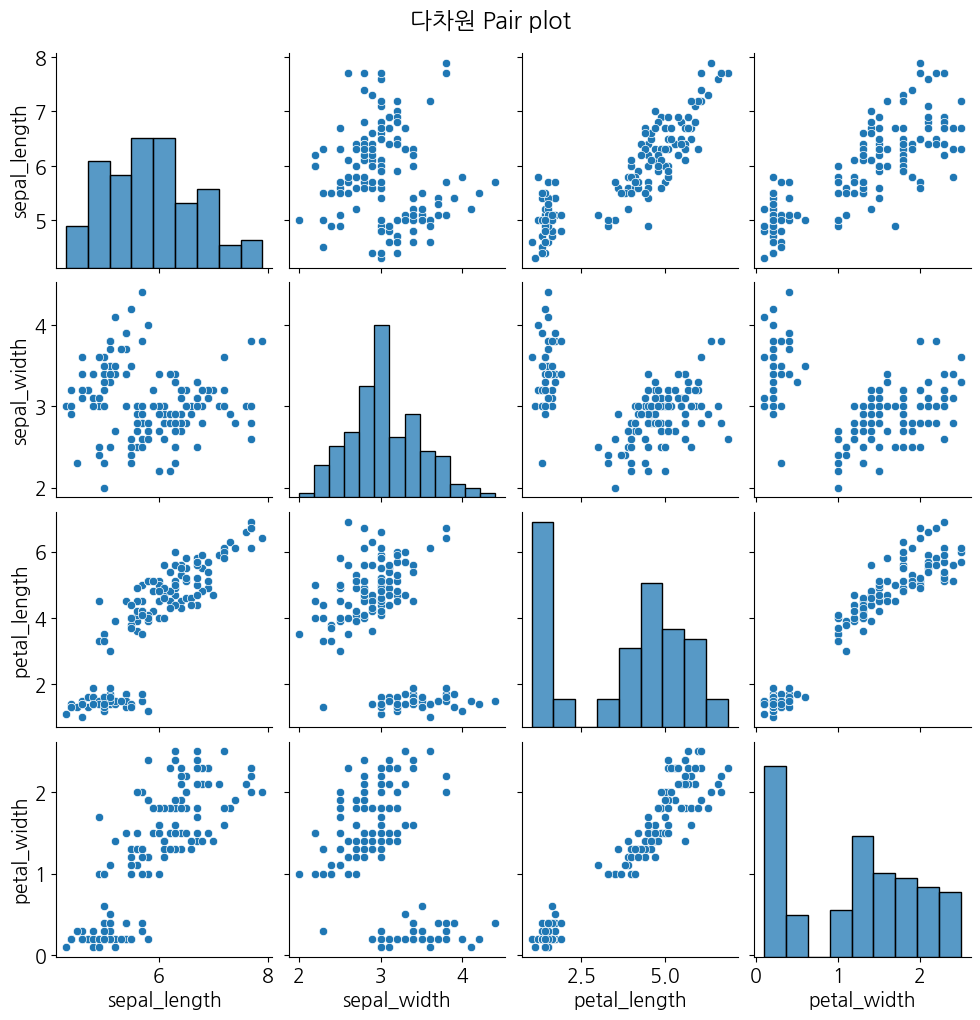

In [28]:
seaborn.pairplot(iris)
plt.suptitle('다차원 Pair plot', y = '1.02')
plt.show()

카테고리형 데이터가 포함되어 있는 경우라면 `hue` 인수에 카테고리 변수 이름을 지정함

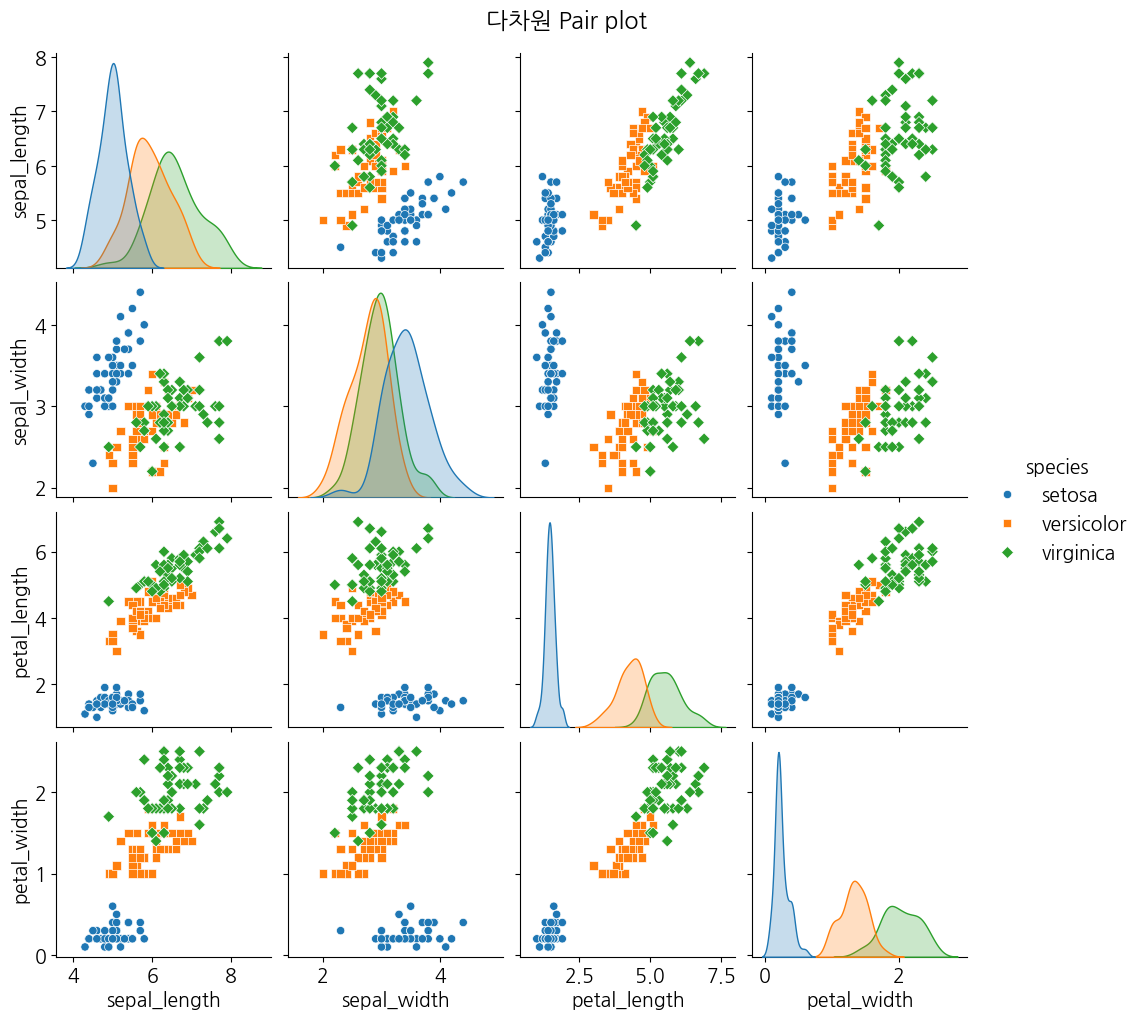

In [29]:
seaborn.pairplot(iris, hue='species', markers= ['o', 's', 'D'])
plt.suptitle('다차원 Pair plot', y = '1.02')
plt.show()

#### 2차원 카테고리 데이터
데이터가 2차원이면서 모두 카테고리 값이면 `heatmap()` 메서드로 히트맵을 표현할 수 있음

In [30]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

C:\Users\ITPS\AppData\Local\Temp\ipykernel_12072\4072891046.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic_size = titanic.pivot_table(


sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


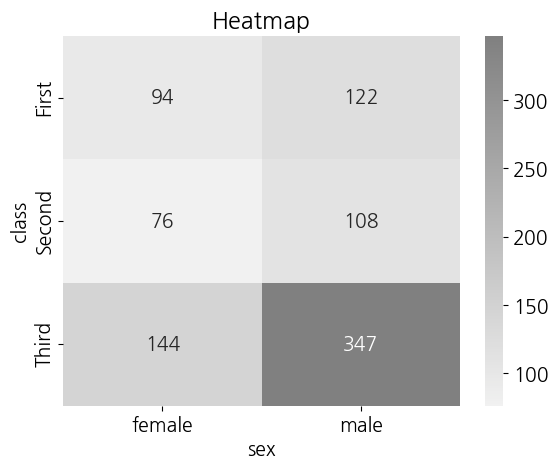

In [32]:
seaborn.heatmap(titanic_size, cmap=seaborn.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
# titanic_size: 히트맵에 표시될 데이터를 의미, 이 데이터는 행과 열의 크기에 따라 정의된 2차원 배열 또는 데이터프레임
# cmap=seaborn.light_palette("gray", as_cmap=True): 색상 맵을 지정
# annot=True: 각 셀에 숫자 값을 표시할지 여부를 지정, True로 설정하면 히트맵의 각 셀에 숫자 값이 표시됩니다.
# fmt="d": 숫자 값을 표시할 때 사용할 형식을 지정, 여기서 "d"는 정수를 나타내는 서식입니다.
plt.title("Heatmap")
plt.show()

#### 2차원 복합 데이터
데이터가 2차원이면서 실수 값, 카테고리 값이 섞여 있다면 기존 플롯 이외에도 다른 플롯을 사용할 수 있음  

`barplot()` : 카테고리 값에 따른 실수 값의 평균과 표준 편차를 바 형태로 표시  
            평균은 막대 그래프, 편차는 에러바로 표현

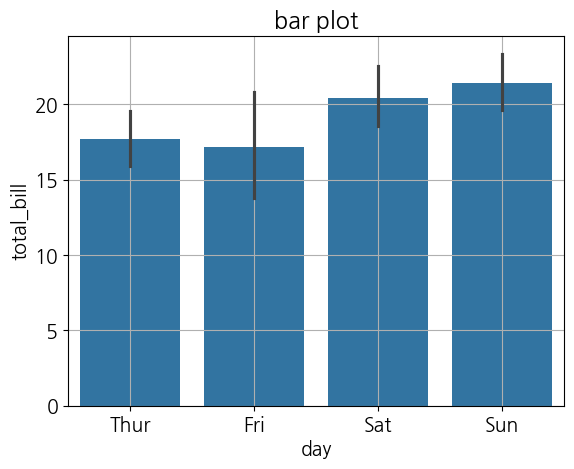

In [33]:
seaborn.barplot(data = tips, x = 'day', y = 'total_bill')
plt.title('bar plot')
plt.grid(True)
plt.show()

`boxplot()` : 4분위수와 아웃라이어라는 데이터를 표현하는 방법

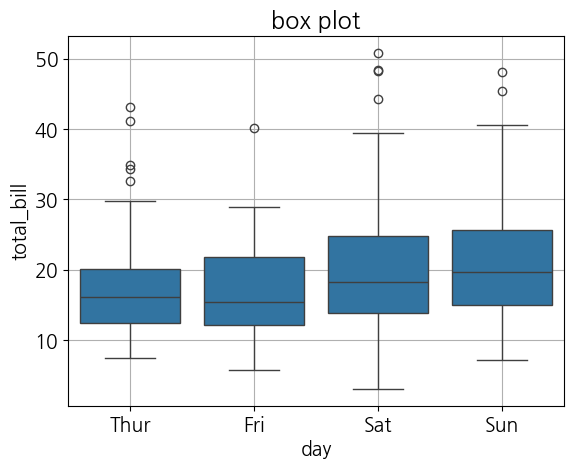

In [34]:
seaborn.boxplot(data = tips, x = 'day', y = 'total_bill')
plt.title('box plot')
plt.grid(True)
plt.show()

`violinplot()` : 세로 방향으로 커널 밀도 히스토그램을 그려줌

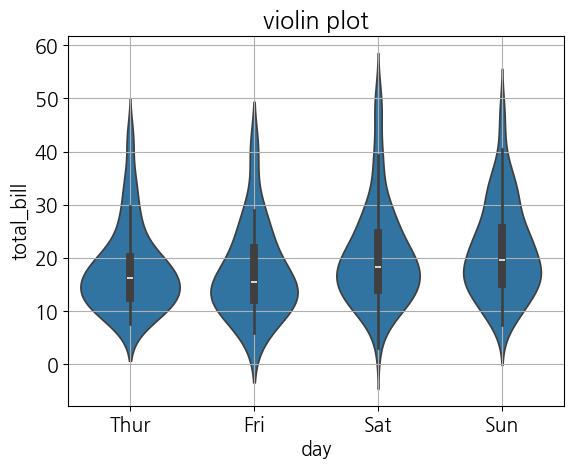

In [35]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill')
plt.title('violin plot')
plt.grid(True)
plt.show()

`stripplot()` : 모든 데이터를 점으로 표시해서 보여줌

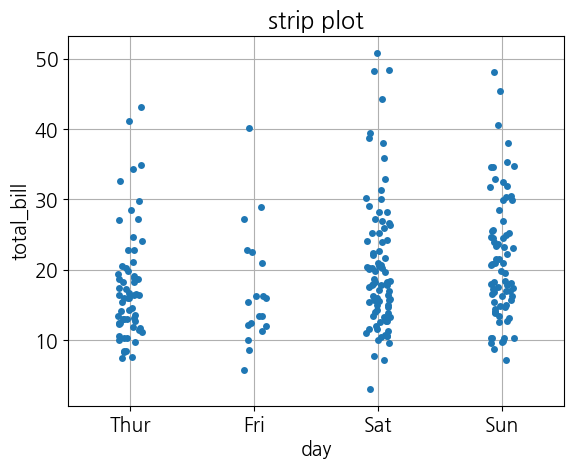

In [46]:
seaborn.stripplot(data = tips, x = 'day', y = 'total_bill', jitter= True)
plt.title('strip plot')
plt.grid(True)
plt.show()

`swarmplot()` : `stripplot`에서 데이터가 겹치는 부분을 겹치지 않게 표현

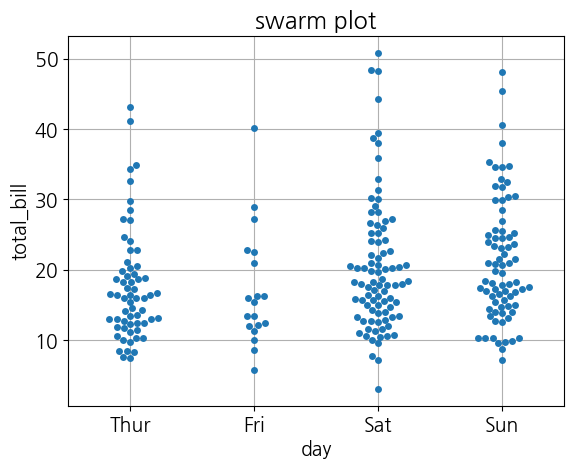

In [48]:
seaborn.swarmplot(data = tips, x = 'day', y = 'total_bill')
plt.title('swarm plot')
plt.grid(True)
plt.show()

### seaborn을 활용한 다차원 복합 데이터
seaborn에서 제공해주는 플롯 메서드들은 `hue` 인수로 카테고리 값을 추가로 지정할 수 있음

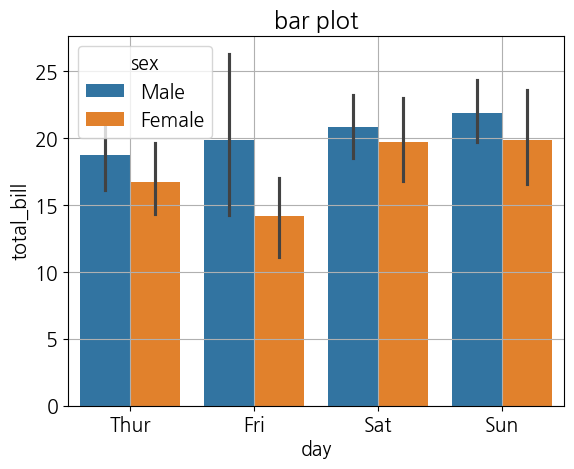

In [54]:
seaborn.barplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex')
plt.title('bar plot')
plt.grid(True)
plt.show()

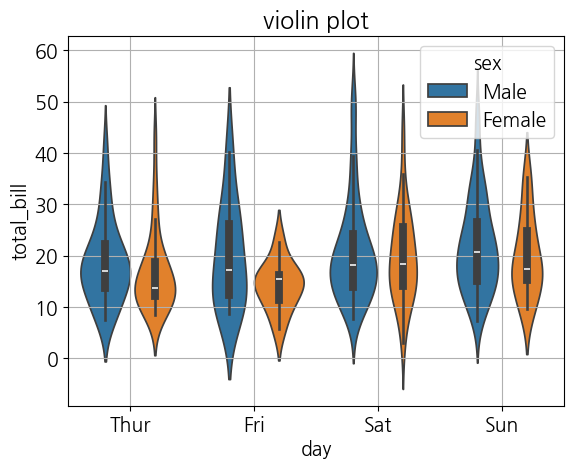

In [51]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex')
plt.title('violin plot')
plt.grid(True)
plt.show()

`stripplot()`, `violinplot()`, `swarmplot()`은 `split`, `dodge` 인수로 시각화 방법을 변경할 수 있음

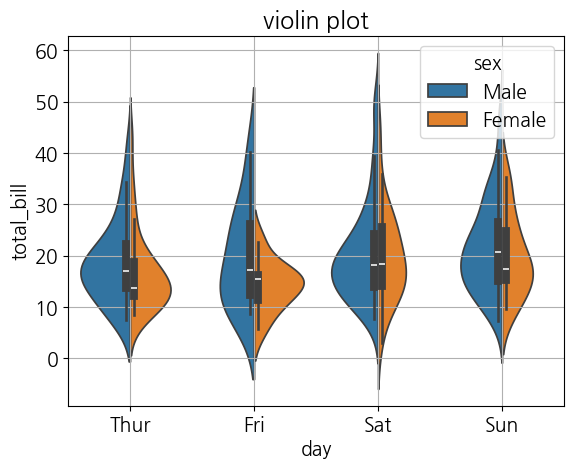

In [55]:
seaborn.violinplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', split = True)
plt.title('violin plot')
plt.grid(True)
plt.show()

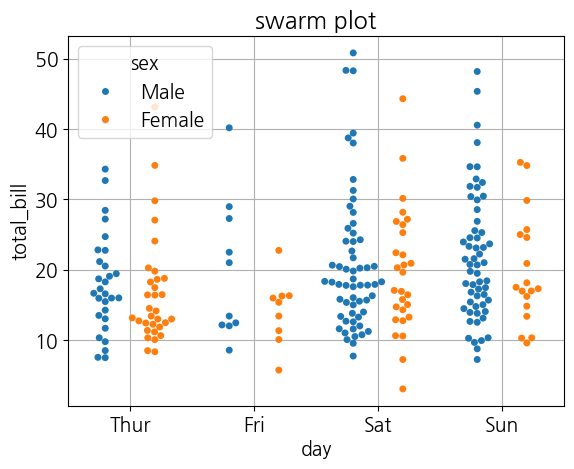

In [56]:
seaborn.swarmplot(data = tips, x = 'day', y = 'total_bill', hue = 'sex', dodge = True)
plt.title('swarm plot')
plt.grid(True)
plt.show()

`heatmap`으로도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있음

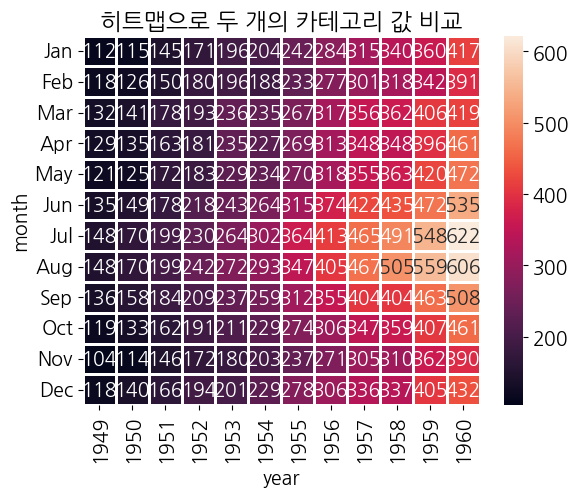

In [62]:
passengers = flights.pivot(index = 'month', columns = 'year', values = 'passengers')
plt.title('히트맵으로 두 개의 카테고리 값 비교')
seaborn.heatmap(passengers, annot = True, fmt = 'd', linewidths = 1)
plt.show()

### seaborn을 활용한 catplot
색상과 행을 사용해서 3개 이상의 카테고리 값의 분포를 표현

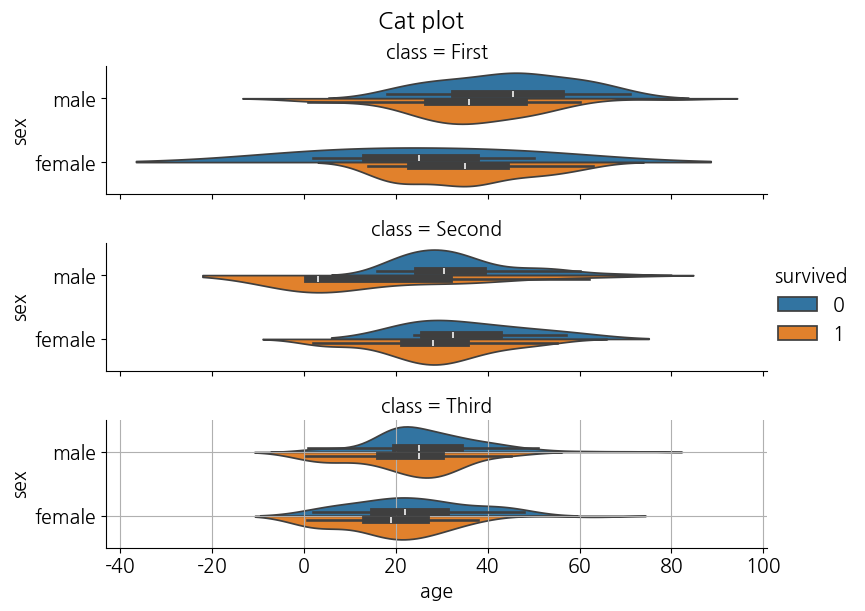

In [65]:
data = titanic[titanic.survived.notnull()]

seaborn.catplot(data = data, x = 'age', y = 'sex', hue = 'survived', row = 'class',
            kind = 'violin', split = True, height = 2, aspect = 4)
plt.suptitle('Cat plot', y = 1.02)
plt.grid(True)
plt.show()

### seaborn을 활용한 차트 겹치기
시각적 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표기 가능

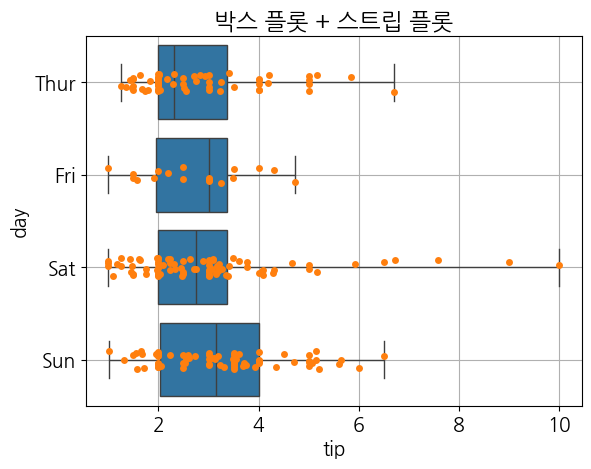

In [7]:
plt.title('박스 플롯 + 스트립 플롯')
seaborn.boxplot(data = tips, x = 'tip', y = 'day', whis = np.inf)
seaborn.stripplot(data = tips, x = 'tip', y = 'day')
plt.grid(True)
plt.show()

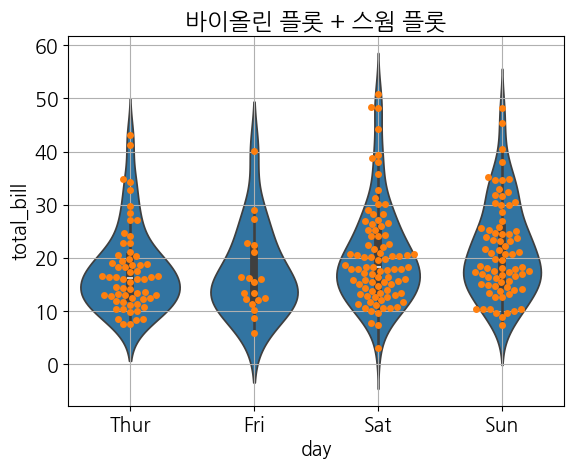

In [11]:
plt.title('바이올린 플롯 + 스웜 플롯')
seaborn.violinplot(data= tips, x = 'day', y = 'total_bill')
seaborn.swarmplot(data = tips, x = 'day', y = 'total_bill')
plt.grid(True)
plt.show()

### seaborn을 활용한 스타일 변경
seaborn 패키지는 matplotlib에서 제공하는 기본 스타일이 아닌 특정 스타일로 변경할 수 있도록 함  

`set()` 메세드로 색상, 틱 스타일 등을 변경할 수 있음  

`set_style()` 메서드로 틱 스타일만 변경할 수 있음

In [17]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for number in range(1, 7):
        plt.plot(x, np.sin(x + number * .5) * (7 - number) * flip)
    plt.show()

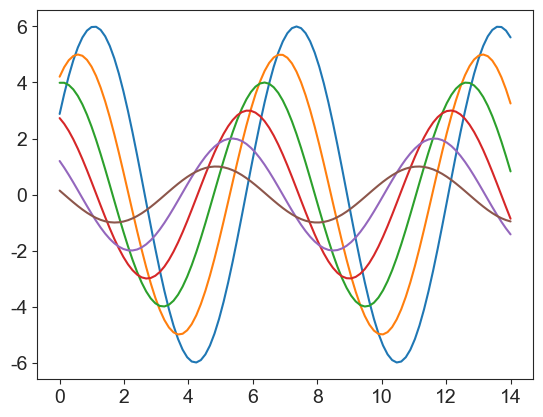

In [24]:
seaborn.set_style('ticks')
sinplot()

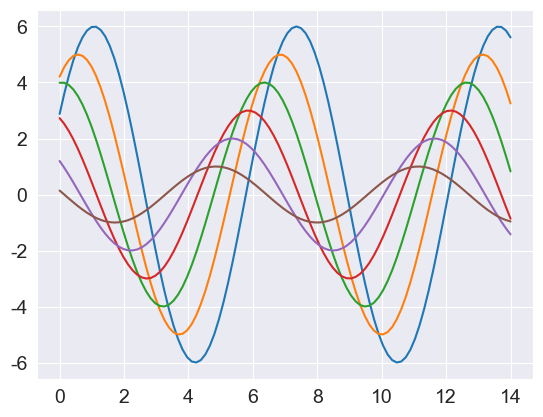

In [19]:
seaborn.set_style('darkgrid')
sinplot()

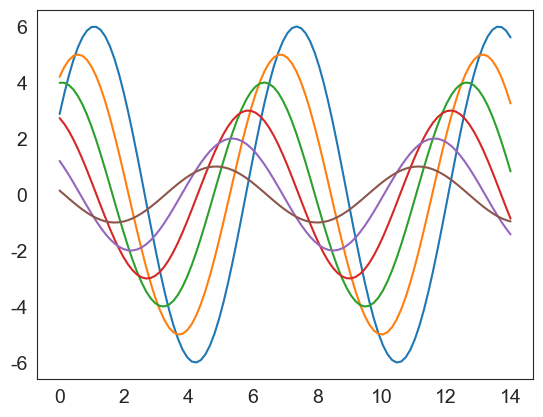

In [28]:
seaborn.set_style('white')
sinplot()

### pandas 패키지의 시각화 기능
pandas 패키지의 series, dataframe 객체는 자체적으로 plot 메서드를 이용해서 시각화 할 수 있음  

`plot()` 메서드의 `kind` 인수로 표현할 플롯을 지정할 수 있음  

또는 plot 속성의 각 차트 메서드로 바로 특정 플롯으로 표현할 수 있음

In [26]:
df = pd.DataFrame(np.random.randn(100, 3),
                   index = pd.date_range('2024-03-05', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df

,A,B,C
2024-03-05,-0.248867,0.795007,-0.729099
2024-03-06,1.616041,1.531287,-0.286635
2024-03-07,0.383111,0.194814,-0.640069
2024-03-08,0.621618,-0.037600,-0.663348
2024-03-09,0.328336,-0.371788,-0.787354
...,...,...,...
2024-06-08,-4.033217,7.178750,-8.985133
2024-06-09,-5.065636,7.897496,-8.877279
2024-06-10,-4.237559,6.511242,-8.255237
2024-06-11,-4.372316,5.825845,-8.644252


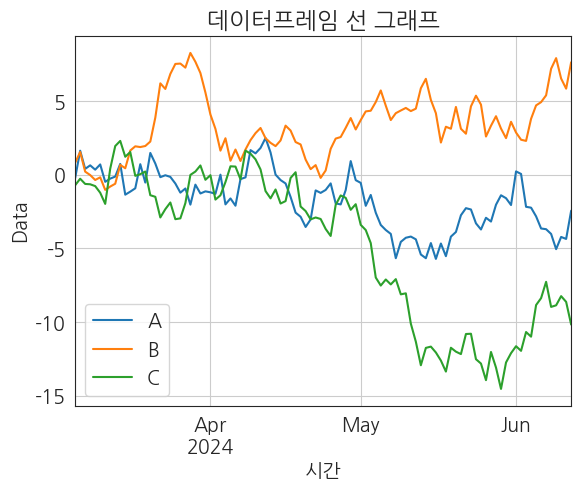

In [32]:
df.plot()
plt.title('데이터프레임 선 그래프')
plt.xlabel('시간')
plt.ylabel('Data')
plt.grid(True)
plt.show()

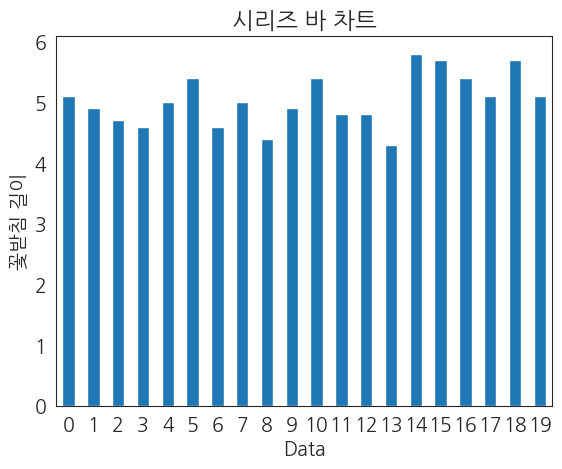

In [35]:
data = iris.sepal_length[:20]
data.plot.bar(rot = 0)
plt.title('시리즈 바 차트')
plt.xlabel('Data')
plt.ylabel('꽃받침 길이')
plt.show()

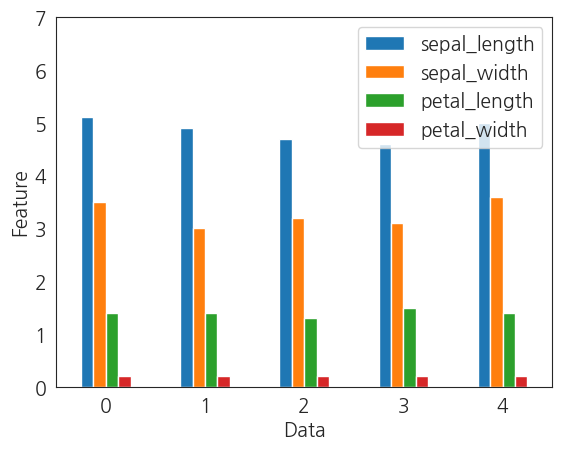

In [36]:
data = iris[:5]
data.plot.bar(rot = 0)
plt.xlabel('Data')
plt.ylabel('Feature')
plt.ylim(0, 7)
plt.show()

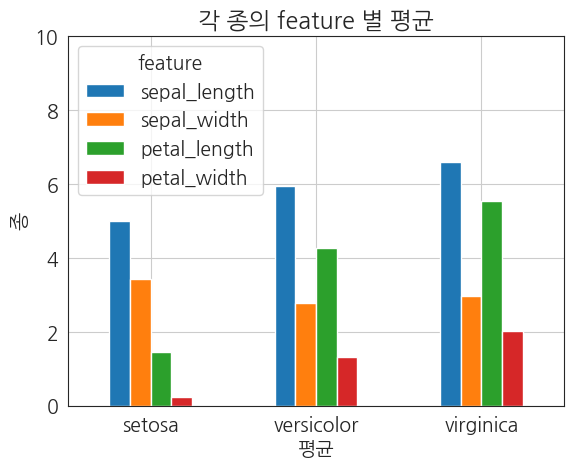

In [38]:
data = iris.groupby(iris.species).mean()
data.columns.name = 'feature'
data.plot.bar(rot = 0)
plt.title('각 종의 feature 별 평균')
plt.xlabel('평균')
plt.ylabel('종')
plt.ylim(0, 10)
plt.grid(True)
plt.show()

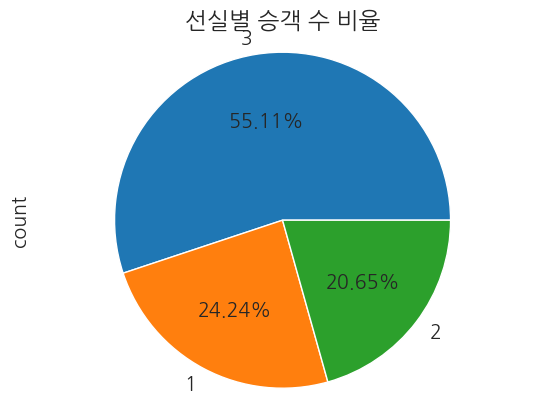

In [43]:
data = titanic.pclass.value_counts()
data.plot.pie(autopct = '%.2f%%')
plt.title('선실별 승객 수 비율')
plt.axis('equal')
plt.grid(True)
plt.show()

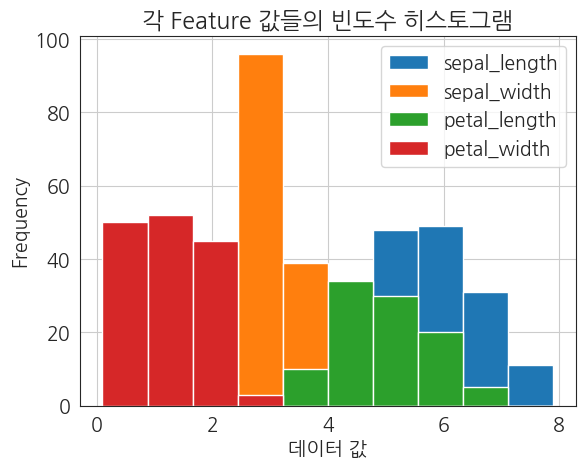

In [44]:
iris.plot.hist()
plt.title('각 Feature 값들의 빈도수 히스토그램')
plt.xlabel('데이터 값')
plt.grid(True)
plt.show()

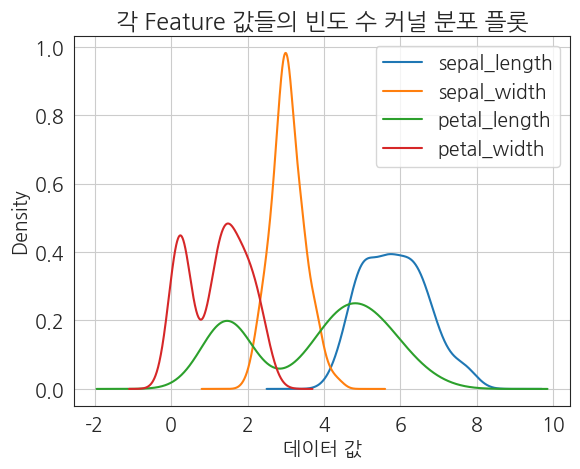

In [48]:
iris.plot.kde()
plt.title('각 Feature 값들의 빈도 수 커널 분포 플롯')
plt.xlabel('데이터 값')
plt.grid(True)
plt.show()

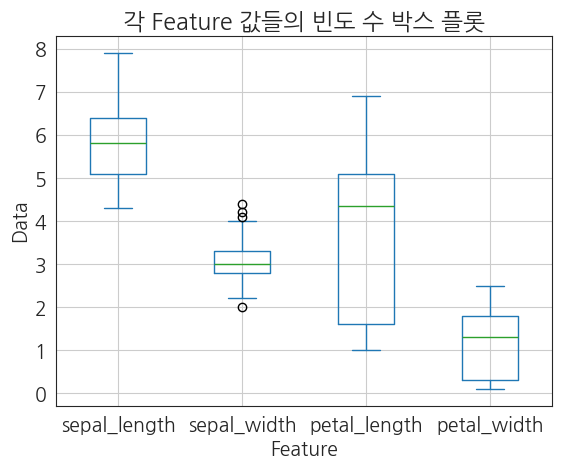

In [49]:
iris.plot.box()
plt.title('각 Feature 값들의 빈도 수 박스 플롯')
plt.xlabel('Feature')
plt.ylabel('Data')
plt.grid(True)
plt.show()

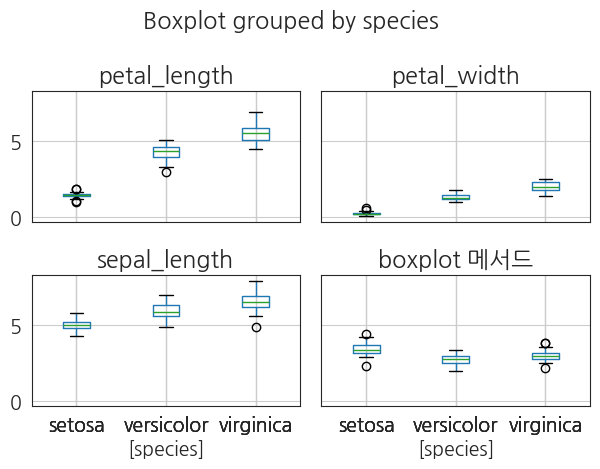

In [53]:
iris.boxplot(by = 'species')
plt.tight_layout()
plt.title('boxplot 메서드')
plt.show()